<a href="https://colab.research.google.com/github/Ro-shni/Zeotap/blob/main/Roshni_Nekkanti_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DB Index: 0.8578776452303758
Silhouette Score: 0.36323110815386495


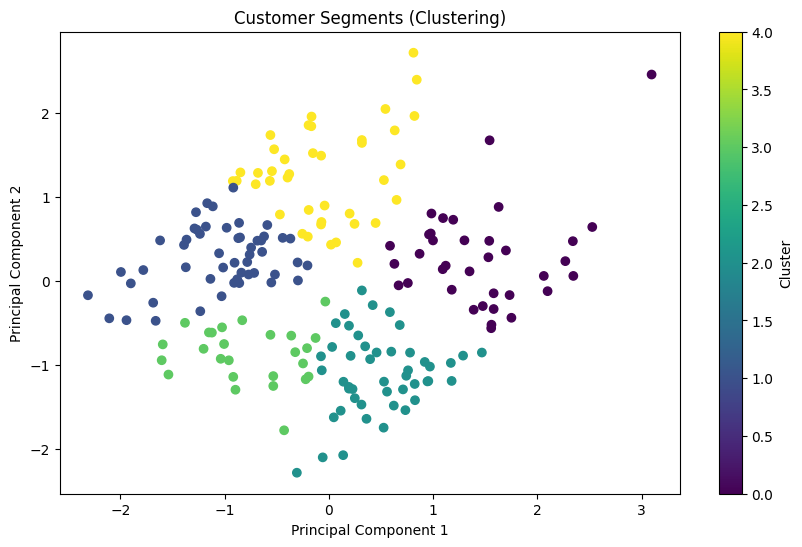

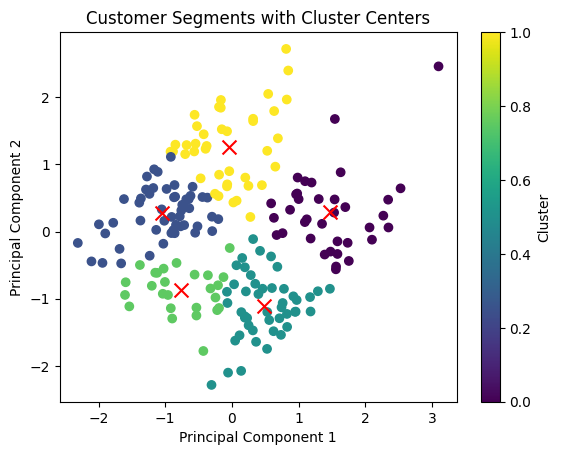

Number of clusters formed: 5
DB Index: 0.8578776452303758
Silhouette Score: 0.36323110815386495


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Calculate Total Spending (Price * Quantity) for each transaction
transactions_df['TotalSpending'] = transactions_df['Quantity'] * transactions_df['Price']

customer_spending = transactions_df.groupby('CustomerID')['TotalSpending'].sum().reset_index()

purchase_frequency = transactions_df.groupby('CustomerID')['TransactionID'].count().reset_index()
purchase_frequency = purchase_frequency.rename(columns={'TransactionID': 'PurchaseFrequency'})

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['Recency'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days

customers_df = customers_df.merge(customer_spending, on='CustomerID', how='left')
customers_df = customers_df.merge(purchase_frequency, on='CustomerID', how='left')

customers_df['TotalSpending'] = customers_df['TotalSpending'].fillna(0)
customers_df['PurchaseFrequency'] = customers_df['PurchaseFrequency'].fillna(0)

features = ['TotalSpending', 'Recency']
X = customers_df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(X_scaled)

db_index = davies_bouldin_score(X_scaled, customers_df['Cluster'])
silhouette_avg = silhouette_score(X_scaled, customers_df['Cluster'])

print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['Cluster'], cmap='viridis')
plt.title("Customer Segments (Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['Cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.title("Customer Segments with Cluster Centers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# clustering results
num_clusters = len(np.unique(customers_df['Cluster']))
print(f"Number of clusters formed: {num_clusters}")
print(f"DB Index: {db_index}")


DB Index: 0.9140504085547729


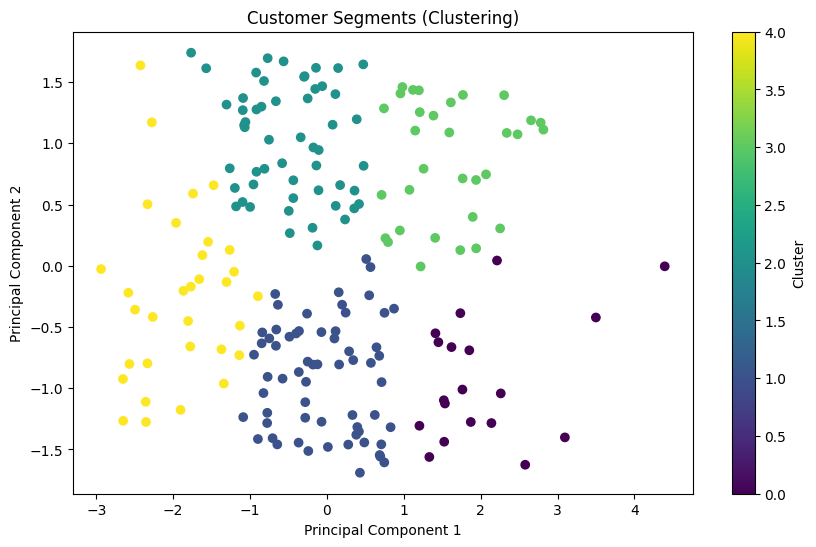

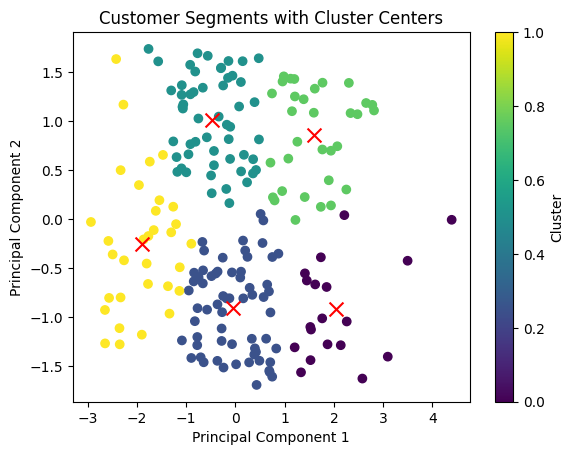

Number of clusters formed: 5
DB Index: 0.9140504085547729


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

transactions_df['TotalSpending'] = transactions_df['Quantity'] * transactions_df['Price']

customer_spending = transactions_df.groupby('CustomerID')['TotalSpending'].sum().reset_index()

purchase_frequency = transactions_df.groupby('CustomerID')['TransactionID'].count().reset_index()
purchase_frequency = purchase_frequency.rename(columns={'TransactionID': 'PurchaseFrequency'})

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['Recency'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days

customers_df = customers_df.merge(customer_spending, on='CustomerID', how='left')
customers_df = customers_df.merge(purchase_frequency, on='CustomerID', how='left')

customers_df['TotalSpending'] = customers_df['TotalSpending'].fillna(0)
customers_df['PurchaseFrequency'] = customers_df['PurchaseFrequency'].fillna(0)

features = ['TotalSpending','PurchaseFrequency', 'Recency']
X = customers_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(X_scaled)

db_index = davies_bouldin_score(X_scaled, customers_df['Cluster'])
silhouette_avg = silhouette_score(X_scaled, customers_df['Cluster'])

print(f"DB Index: {db_index}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ploting
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['Cluster'], cmap='viridis')
plt.title("Customer Segments (Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

#cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['Cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.title("Customer Segments with Cluster Centers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Report
num_clusters = len(np.unique(customers_df['Cluster']))
print(f"Number of clusters formed: {num_clusters}")
print(f"DB Index: {db_index}")

In [ ]:
# Correlation matrix
correlation_matrix = customers_df[['TotalSpending','Recency']].corr()
print(correlation_matrix)


               TotalSpending   Recency
TotalSpending       1.000000  0.038597
Recency             0.038597  1.000000


In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customers_df[['TotalSpending', 'Recency']])

pca = PCA(n_components=2)
pca.fit(X_scaled)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Variance explained by first component:", pca.explained_variance_ratio_[0])


Explained Variance Ratios: [0.51929862 0.48070138]
Variance explained by first component: 0.5192986218867529


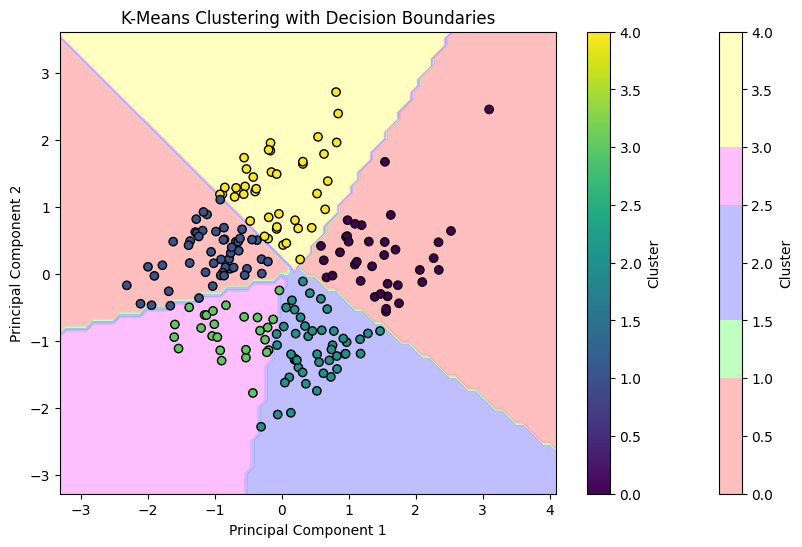

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(X_pca)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# ecision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFAAFF', '#FFFFAA']))
plt.colorbar(label='Cluster')

#actual data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['Cluster'], cmap='viridis', edgecolors='k', marker='o')
plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


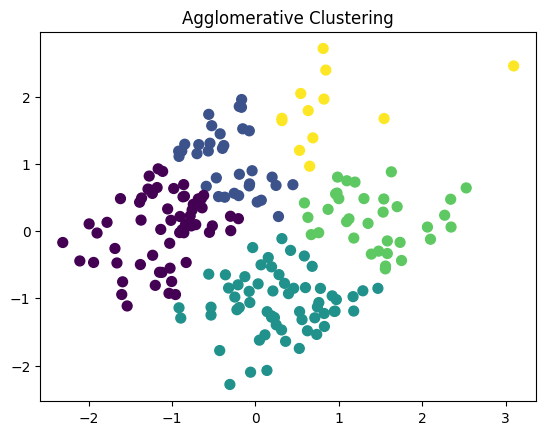

Agglomerative Clustering DB Index: 0.8309656674380397
Agglomerative Clustering Silhouette Score: 0.390678304134499


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# DB Index and Silhouette Score
agg_db_index = davies_bouldin_score(X_scaled, agg_labels)
agg_silhouette_score = silhouette_score(X_scaled, agg_labels)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering")
plt.show()

# Results
print(f"Agglomerative Clustering DB Index: {agg_db_index}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")



K-Means Davies-Bouldin Index: 0.9140504085547729, Silhouette Score: 0.35635316201222333
Agglomerative Davies-Bouldin Index: 0.9087758241027977, Silhouette Score: 0.3268222195108902
DBSCAN Davies-Bouldin Index: 1.5403211028048243, Silhouette Score: 0.019885058227147454
K-Means DB Index: 0.9140504085547729, Silhouette Score: 0.35635316201222333
Agglomerative DB Index: 0.9087758241027977, Silhouette Score: 0.3268222195108902
DBSCAN DB Index: 1.5403211028048243, Silhouette Score: 0.019885058227147454


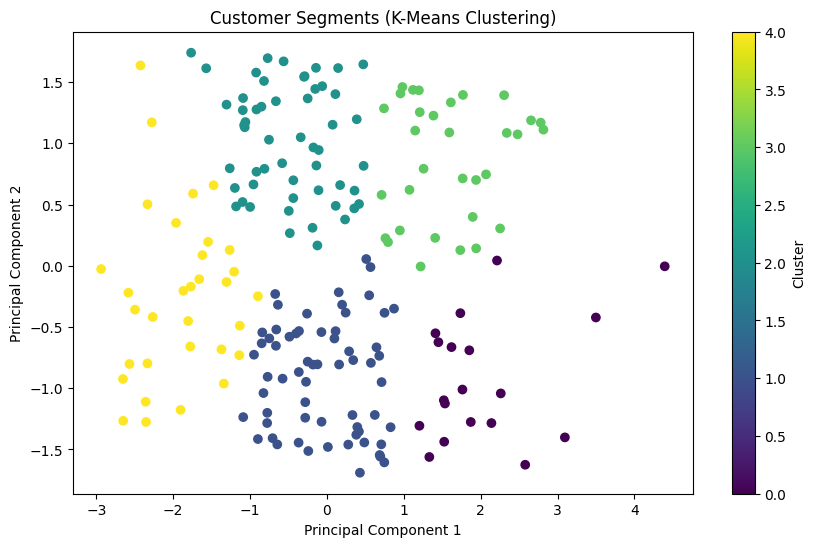

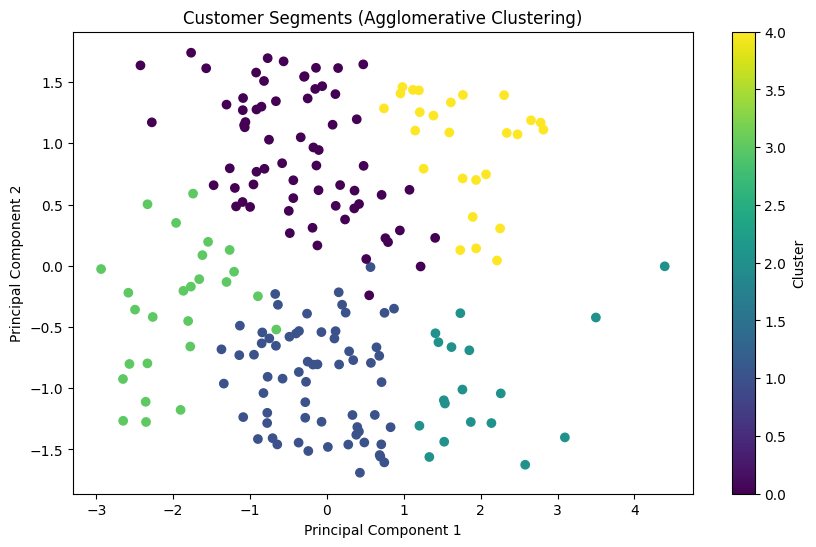

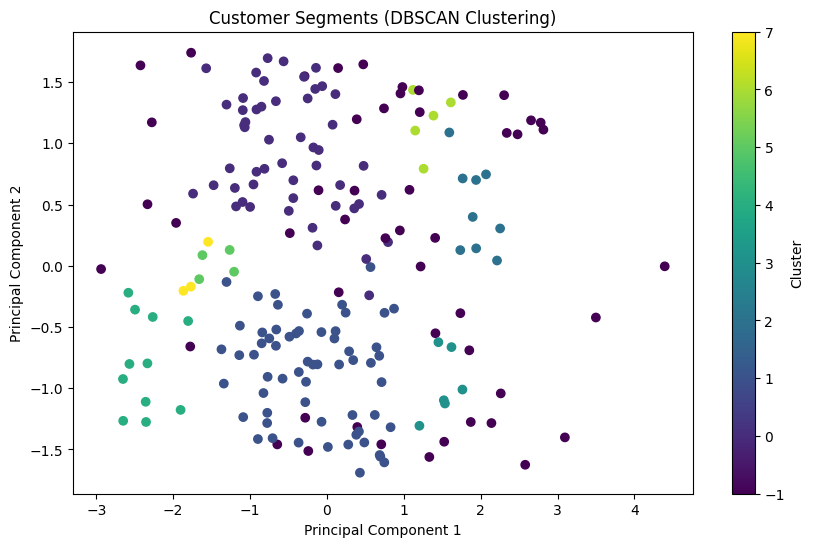

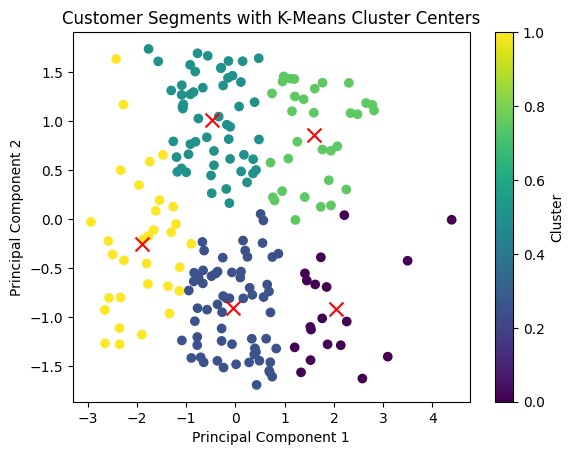

Number of clusters formed by K-Means: 5
Number of clusters formed by Agglomerative: 5
Number of clusters formed by DBSCAN: 9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

transactions_df['TotalSpending'] = transactions_df['Quantity'] * transactions_df['Price']


customer_spending = transactions_df.groupby('CustomerID')['TotalSpending'].sum().reset_index()
purchase_frequency = transactions_df.groupby('CustomerID')['TransactionID'].count().reset_index()
purchase_frequency = purchase_frequency.rename(columns={'TransactionID': 'PurchaseFrequency'})
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['Recency'] = (pd.to_datetime('today') - customers_df['SignupDate']).dt.days
customers_df = customers_df.merge(customer_spending, on='CustomerID', how='left')
customers_df = customers_df.merge(purchase_frequency, on='CustomerID', how='left')
customers_df['TotalSpending'] = customers_df['TotalSpending'].fillna(0)
customers_df['PurchaseFrequency'] = customers_df['PurchaseFrequency'].fillna(0)


features = ['TotalSpending', 'PurchaseFrequency', 'Recency']
X = customers_df[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=5, random_state=42)
customers_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


agg_clustering = AgglomerativeClustering(n_clusters=5)
customers_df['Agglomerative_Cluster'] = agg_clustering.fit_predict(X_scaled)


dbscan = DBSCAN(eps=0.5, min_samples=5)
customers_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

db_index_kmeans = davies_bouldin_score(X_scaled, customers_df['KMeans_Cluster'])
silhouette_avg_kmeans = silhouette_score(X_scaled, customers_df['KMeans_Cluster'])

db_index_agg = davies_bouldin_score(X_scaled, customers_df['Agglomerative_Cluster'])
silhouette_avg_agg = silhouette_score(X_scaled, customers_df['Agglomerative_Cluster'])

db_index_dbscan = davies_bouldin_score(X_scaled, customers_df['DBSCAN_Cluster'])
silhouette_avg_dbscan = silhouette_score(X_scaled, customers_df['DBSCAN_Cluster'])

from sklearn.mixture import GaussianMixture


# evaluation metrics for all clustering methods
print(f'K-Means Davies-Bouldin Index: {db_index_kmeans}, Silhouette Score: {silhouette_avg_kmeans}')
print(f'Agglomerative Davies-Bouldin Index: {db_index_agg}, Silhouette Score: {silhouette_avg_agg}')
print(f'DBSCAN Davies-Bouldin Index: {db_index_dbscan}, Silhouette Score: {silhouette_avg_dbscan}')

#clustering metrics
print(f"K-Means DB Index: {db_index_kmeans}, Silhouette Score: {silhouette_avg_kmeans}")
print(f"Agglomerative DB Index: {db_index_agg}, Silhouette Score: {silhouette_avg_agg}")
print(f"DBSCAN DB Index: {db_index_dbscan}, Silhouette Score: {silhouette_avg_dbscan}")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['KMeans_Cluster'], cmap='viridis')
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['Agglomerative_Cluster'], cmap='viridis')
plt.title("Customer Segments (Agglomerative Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['DBSCAN_Cluster'], cmap='viridis')
plt.title("Customer Segments (DBSCAN Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customers_df['KMeans_Cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.title("Customer Segments with K-Means Cluster Centers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Repors
print(f"Number of clusters formed by K-Means: {len(np.unique(customers_df['KMeans_Cluster']))}")
print(f"Number of clusters formed by Agglomerative: {len(np.unique(customers_df['Agglomerative_Cluster']))}")
print(f"Number of clusters formed by DBSCAN: {len(np.unique(customers_df['DBSCAN_Cluster']))}")


In [ ]:
pip install minisom


In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from minisom import MiniSom

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def print_db_index(X_scaled, cluster_labels, method_name):
    db_index = davies_bouldin_score(X_scaled, cluster_labels)
    print(f"{method_name} DB Index: {db_index}")
    return db_index

#Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=5, linkage='ward')
customers_df['Agglomerative_Cluster'] = agg_clust.fit_predict(X_scaled)
print_db_index(X_scaled, customers_df['Agglomerative_Cluster'], 'Agglomerative Clustering')

# perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customers_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
print_db_index(X_scaled, customers_df['KMeans_Cluster'], 'KMeans')

# perform affinity Propagation
affinity_model = AffinityPropagation(random_state=42)
customers_df['Affinity_Cluster'] = affinity_model.fit_predict(X_scaled)
print_db_index(X_scaled, customers_df['Affinity_Cluster'], 'Affinity Propagation')

#som
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(X_scaled, 100)
som_clusters = np.array([som.winner(x) for x in X_scaled])
customers_df['SOM_Cluster'] = [10 * x[0] + x[1] for x in som_clusters]
print_db_index(X_scaled, customers_df['SOM_Cluster'], 'Self-Organizing Map')




Agglomerative Clustering DB Index: 0.9087758241027977
KMeans DB Index: 0.9140504085547729
Affinity Propagation DB Index: 1.0198546041406313
Self-Organizing Map DB Index: 0.8454662495067634


0.8454662495067634